In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/word2vec/__results__.html
/kaggle/input/word2vec/__notebook__.ipynb
/kaggle/input/word2vec/__output__.json
/kaggle/input/word2vec/w2v_text_summ_200d_09162019
/kaggle/input/word2vec/custom.css
/kaggle/input/glovetwitter27b/glove.twitter.27B.200d.txt
/kaggle/input/glovetwitter27b/glove.twitter.27B.25d.txt
/kaggle/input/glovetwitter27b/glove.twitter.27B.50d.txt
/kaggle/input/glovetwitter27b/glove.twitter.27B.100d.txt
/kaggle/input/fasttext/wiki.simple.vec


Loading data...
0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object
   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


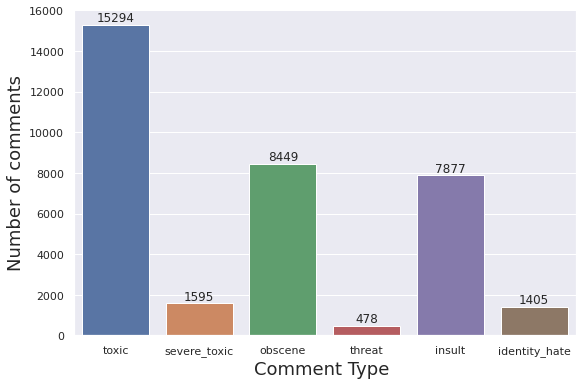

None

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
print('Loading data...')
df = pd.read_csv(r"/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

comment = df['comment_text']
print(comment.head())
comment=comment.values


bins = [1,300,500,700,900,1100,1300]
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())
label = label.values

x=df.iloc[:,2:].sum()
xx=df.iloc[:,2:]
len(xx)
#print(x.index)
sns.set(font_scale = 1)
plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values)
#plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label,ha='center', va='bottom')

display(plt.show())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


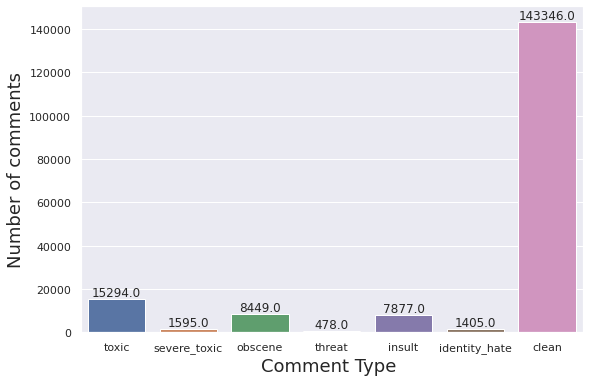

None

In [11]:
df.loc[(df['toxic'].values + df['severe_toxic'].values + df['obscene'].values+ df['threat'].values+ df['insult'].values+ df['identity_hate'].values) == 0, 'clean'] = 1
df.loc[(df['toxic'].values + df['severe_toxic'].values + df['obscene'].values+ df['threat'].values+ df['insult'].values+ df['identity_hate'].values) >= 1, 'clean'] = 0
x=df.iloc[:,2:].sum()
xx=df.iloc[:,2:]
len(xx)
#print(x.index)
sns.set(font_scale = 1)
plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values)
#plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

display(plt.show())

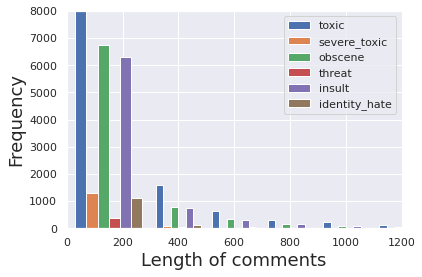

In [12]:
label = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
label = label.values
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['black','red','green','yellow','orange','chartreuse']        
plt.hist(y,bins=bins,label = labelsplt)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments',fontsize=18)
plt.ylabel('Frequency',fontsize=18) 
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


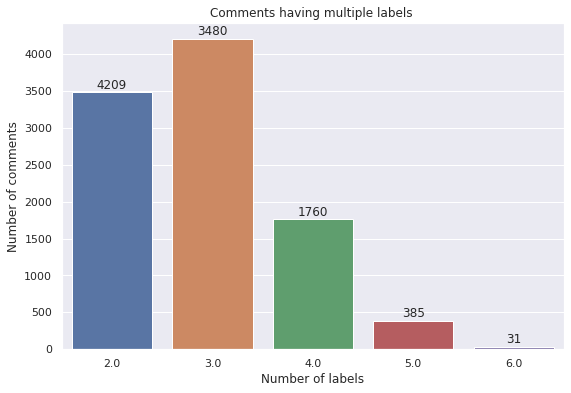

In [13]:
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
plt.figure(figsize=(9,6))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments')
plt.xlabel('Number of labels')
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

<AxesSubplot:>

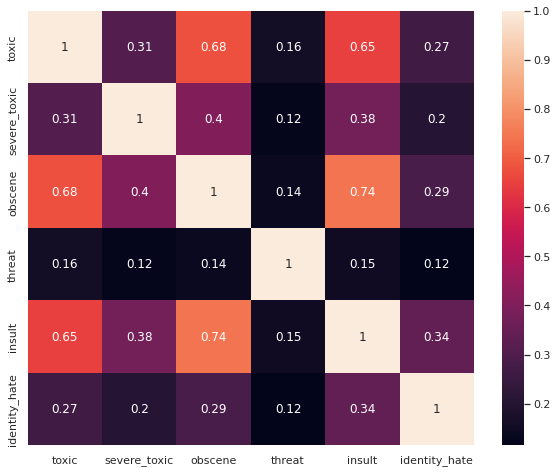

In [79]:
temp_df=df.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

In [2]:
import pandas as pd
import numpy as np
import string
import os
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Input, Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization, SpatialDropout1D, GlobalAveragePooling1D, concatenate, Activation, LSTM, Bidirectional,GRU
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import zipfile
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,multilabel_confusion_matrix

In [4]:
with zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [5]:
with zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [6]:
with zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [7]:

embed_size = 25 # 300 for gloveCC and fasttext
max_features = 20000 
maxlen = 200 

print('Loading data...')
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")
test_labels = pd.read_csv(r"test_labels.csv")

Loading data...


In [8]:
EMBEDDING_FILE = f'glove.twitter.27B.25d.txt'  # or glove.840B.300d.txt or fasttext_wiki.vec

test = pd.concat([test, test_labels], axis=1)
test = test[test['toxic']!=-1]

classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
y_test = test[classes].values

train_sentences = train["comment_text"].fillna("fillna")
test_sentences = test["comment_text"].fillna("fillna")


In [9]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
   
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()
    
    ### START CODE HERE
    
    sw = stopwords
    text = [str for str in sentence.split() if str not in sw]
    sentence = ' '.join(text)
    
    ### END CODE HERE
    return sentence


In [10]:
train = []
for row in train_sentences:
      text= row
      sentence = remove_stopwords(text)
      train.append(sentence)

In [11]:
train[12235]

'" note read above, follow links, reader can see cited correctly links added subject. vidkun added anotations make read oposite, links show ""official"" line taken ugle. will not trapped user so-called 3rr, can peddle pov. strangly, ""masons"" quiet, leaving ‘‘me’’ defend factual truth own. ""thanks"" brethren. sitting blocking given... "'

In [12]:
test = []
for row in test_sentences:
      text= row
      sentence = remove_stopwords(text)
      test.append(sentence)

In [13]:
# Bundle the two lists into a single one
import random
sentences_and_labels = list(zip(train, y))

# Perform random sampling
random.seed(42)
sentences_and_labels = random.sample(sentences_and_labels, 50000)

# Unpack back into separate lists
train, y = zip(*sentences_and_labels)

print(f"There are {len(train)} sentences and {len(y)} labels after random sampling\n")

There are 50000 sentences and 50000 labels after random sampling



In [14]:
train = np.asarray(train)
y =np.asarray(y)

In [15]:
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets
    
    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set
    
    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """    
    ### START CODE HERE
    
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences)*training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[0:train_size]
    train_labels = labels[0:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    ### END CODE HERE
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [16]:
train, val, train_labels, val_labels = train_val_split(train, y, 0.9)

In [17]:
train.shape

(45000,)

In [18]:
oov_token ="<OOV>"
tokenizer = Tokenizer(num_words=max_features,oov_token =oov_token)
tokenizer.fit_on_texts(list(train_sentences))



tokenized_train_sentences = tokenizer.texts_to_sequences(train)
tokenized_val_sentences = tokenizer.texts_to_sequences(val)

train_padding = pad_sequences(tokenized_train_sentences, maxlen)
val_padding = pad_sequences(tokenized_val_sentences, maxlen)
tokenized_test_sentences = tokenizer.texts_to_sequences(test_sentences)
test_padding = pad_sequences(tokenized_test_sentences, maxlen)

In [19]:
val_padding.shape

(5000, 200)

# LSTM

In [46]:
tf.random.set_seed(123)
num_words =20000   


    ### START CODE HERE
    
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(num_words, embed_size,input_length = maxlen),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='sigmoid')

])

model.compile(loss= 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 


In [47]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_padding, train_labels, batch_size =64, epochs=50, validation_data=(val_padding, val_labels),callbacks=es_callback)

Epoch 1/50
704/704 [==============================] - 138s 192ms/step - loss: 0.1336 - accuracy: 0.7074 - val_loss: 0.0709 - val_accuracy: 0.9918
Epoch 2/50
704/704 [==============================] - 134s 191ms/step - loss: 0.0575 - accuracy: 0.9448 - val_loss: 0.0597 - val_accuracy: 0.9918
Epoch 3/50
704/704 [==============================] - 135s 191ms/step - loss: 0.0600 - accuracy: 0.9677 - val_loss: 0.0699 - val_accuracy: 0.9918
Epoch 4/50
704/704 [==============================] - 135s 192ms/step - loss: 0.0473 - accuracy: 0.9898 - val_loss: 0.0652 - val_accuracy: 0.9918
Epoch 5/50
704/704 [==============================] - 136s 193ms/step - loss: 0.0417 - accuracy: 0.9910 - val_loss: 0.0695 - val_accuracy: 0.9918


# GLove Embedding

In [20]:
GLOVE_FILE = f'/kaggle/input/glovetwitter27b/glove.twitter.27B.25d.txt'  # or glove.840B.300d.txt or fasttext_wiki.vec

# Initialize an empty embeddings index dictionary
GLOVE_EMBEDDINGS = {}

# Read file and fill GLOVE_EMBEDDINGS with its contents
with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

In [21]:
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

In [43]:
embedding_matrix = np.zeros((VOCAB_SIZE+1, embed_size))

# Iterate all of the words in the vocabulary and if the vector representation for 
# each word exists within GloVe's representations, save it in the EMBEDDINGS_MATRIX array
for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [58]:
import tensorflow as tf
model = tf.keras.Sequential([ 
      # This is how you need to set the Embedding layer when using pre-trained embeddings
      tf.keras.layers.Embedding(VOCAB_SIZE+1, embed_size, input_length=maxlen,weights=[embedding_matrix],trainable=False), 
      tf.keras.layers.Conv1D(32, kernel_size = 3, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(16, activation = 'relu'),
      tf.keras.layers.Dense(6, activation = 'sigmoid')
  ])
model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                  metrics=['accuracy'])

In [59]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.05):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [60]:
history = model.fit(train_padding, train_labels, batch_size =64, epochs=50, validation_data=(val_padding, val_labels))

Epoch 1/50
704/704 [==============================] - 3s 4ms/step - loss: 0.1591 - accuracy: 0.7510 - val_loss: 0.1168 - val_accuracy: 0.9898
Epoch 2/50
704/704 [==============================] - 3s 4ms/step - loss: 0.1032 - accuracy: 0.9922 - val_loss: 0.1059 - val_accuracy: 0.9888
Epoch 3/50
704/704 [==============================] - 3s 4ms/step - loss: 0.0955 - accuracy: 0.9918 - val_loss: 0.0988 - val_accuracy: 0.9898
Epoch 4/50
704/704 [==============================] - 3s 4ms/step - loss: 0.0911 - accuracy: 0.9924 - val_loss: 0.1036 - val_accuracy: 0.9914
Epoch 5/50
704/704 [==============================] - 3s 5ms/step - loss: 0.0880 - accuracy: 0.9931 - val_loss: 0.0933 - val_accuracy: 0.9918
Epoch 6/50
704/704 [==============================] - 3s 4ms/step - loss: 0.0857 - accuracy: 0.9939 - val_loss: 0.0888 - val_accuracy: 0.9918
Epoch 7/50
704/704 [==============================] - 3s 4ms/step - loss: 0.0833 - accuracy: 0.9939 - val_loss: 0.0856 - val_accuracy: 0.9918
Epoch 

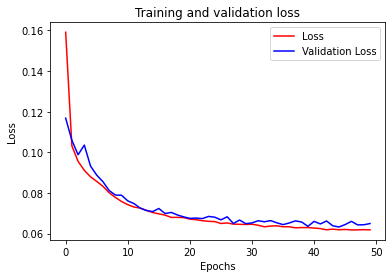

In [62]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(50)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

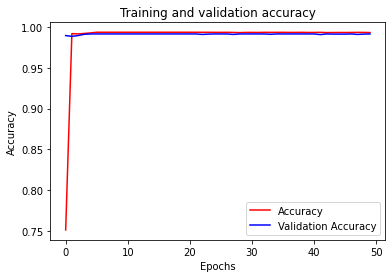

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [35]:
scores = model.evaluate(train_padding, train_labels)



1407/1407 [==============================] - 3s 2ms/step - loss: 0.0570 - accuracy: 0.9938


In [48]:
test_padding = pad_sequences(tokenized_test_sentences, maxlen)
print("Loading model....")
#model = load_model('model_glovePP.hdf5')
y_pred = model.predict(test_padding)

y_int = np.zeros_like(y_pred)
y_int[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test,y_int)

Loading model....


In [49]:
y_test.shape

(63978, 6)

In [50]:
accuracy 

0.8984025758854606

In [39]:
rocauc = roc_auc_score(y_test, y_pred)

In [51]:
rocauc 

0.9395260005565662

In [64]:
print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))

Classification report               precision    recall  f1-score   support

           0       0.69      0.26      0.38      6090
           1       0.29      0.03      0.05       367
           2       0.69      0.21      0.33      3691
           3       0.00      0.00      0.00       211
           4       0.63      0.18      0.27      3427
           5       0.00      0.00      0.00       712

   micro avg       0.68      0.21      0.32     14498
   macro avg       0.38      0.11      0.17     14498
weighted avg       0.62      0.21      0.31     14498
 samples avg       0.02      0.02      0.02     14498

Confusion matrix [[[57189   699]
  [ 4507  1583]]

 [[63584    27]
  [  356    11]]

 [[59938   349]
  [ 2900   791]]

 [[63767     0]
  [  211     0]]

 [[60196   355]
  [ 2826   601]]

 [[63266     0]
  [  712     0]]]


In [48]:
len(y_int[y_int>0])


8800

In [43]:
import tensorflow as tf
inputs = Input(shape=(maxlen,))
x = Embedding(VOCAB_SIZE+1, embed_size, input_length=maxlen,weights=[embedding_matrix],trainable=False)(inputs)
x = LSTM(64)(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
output = Dense(6, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [44]:
history = model.fit(train_padding, train_labels, batch_size =32, epochs=10, validation_data=(val_padding, val_labels))

Epoch 1/10
4488/4488 [==============================] - 703s 156ms/step - loss: 0.0745 - accuracy: 0.9725 - val_loss: 0.0621 - val_accuracy: 0.9940
Epoch 2/10
4488/4488 [==============================] - 706s 157ms/step - loss: 0.0611 - accuracy: 0.9940 - val_loss: 0.0605 - val_accuracy: 0.9940
Epoch 3/10
4488/4488 [==============================] - 698s 155ms/step - loss: 0.0579 - accuracy: 0.9938 - val_loss: 0.0569 - val_accuracy: 0.9940
Epoch 4/10
4488/4488 [==============================] - 696s 155ms/step - loss: 0.0559 - accuracy: 0.9938 - val_loss: 0.0549 - val_accuracy: 0.9940
Epoch 5/10
4488/4488 [==============================] - 694s 155ms/step - loss: 0.0541 - accuracy: 0.9941 - val_loss: 0.0540 - val_accuracy: 0.9940
Epoch 6/10
4488/4488 [==============================] - 698s 156ms/step - loss: 0.0528 - accuracy: 0.9928 - val_loss: 0.0530 - val_accuracy: 0.9940
Epoch 7/10
4488/4488 [==============================] - 703s 157ms/step - loss: 0.0519 - accuracy: 0.9925 - val_

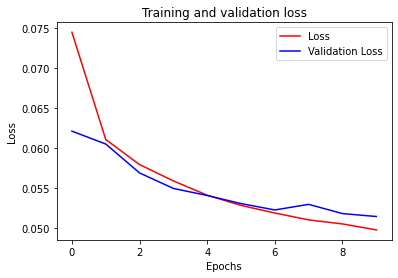

In [45]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = [*range(10)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

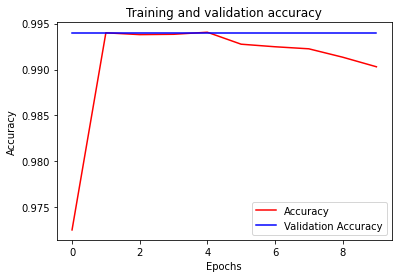

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [47]:
test_padding = pad_sequences(tokenized_test_sentences, maxlen)
print("Loading model....")
#model = load_model('model_glovePP.hdf5')
y_pred = model.predict(test_padding)

y_int = np.zeros_like(y_pred)
y_int[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test,y_int)

Loading model....


In [48]:
print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))

Classification report               precision    recall  f1-score   support

           0       0.63      0.72      0.67      6090
           1       0.43      0.03      0.05       367
           2       0.66      0.71      0.68      3691
           3       0.00      0.00      0.00       211
           4       0.65      0.56      0.60      3427
           5       0.80      0.07      0.13       712

   micro avg       0.64      0.62      0.63     14498
   macro avg       0.53      0.35      0.36     14498
weighted avg       0.64      0.62      0.61     14498
 samples avg       0.06      0.06      0.06     14498

Confusion matrix [[[55303  2585]
  [ 1676  4414]]

 [[63598    13]
  [  357    10]]

 [[58946  1341]
  [ 1075  2616]]

 [[63765     2]
  [  211     0]]

 [[59503  1048]
  [ 1495  1932]]

 [[63253    13]
  [  661    51]]]


In [22]:
inputs = Input(shape=(maxlen,))
x = Embedding(VOCAB_SIZE+1, embed_size, input_length=maxlen,weights=[embedding_matrix],trainable=False)(inputs)
x = GRU(32)(x)
x = Dropout(0.3)(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
output = Dense(6, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

2023-01-19 10:32:51.446411: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



In [24]:
history = model.fit(train_padding, train_labels, batch_size =64, epochs=20, validation_data=(val_padding, val_labels),callbacks=es_callback)

2023-01-19 10:32:52.079082: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
704/704 [==============================] - 133s 183ms/step - loss: 0.1126 - accuracy: 0.8289 - val_loss: 0.0758 - val_accuracy: 0.9918
Epoch 2/20
704/704 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9887

KeyboardInterrupt: 

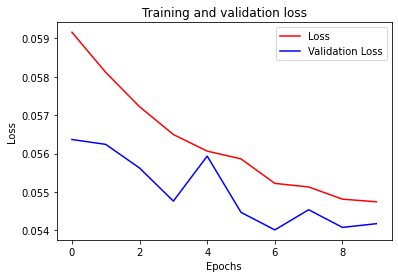

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(10)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

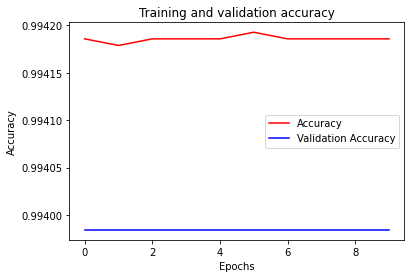

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [38]:

print("Loading model....")
#model = load_model('model_glovePP.hdf5')
y_pred = model.predict(test_padding)

y_int = np.zeros_like(y_pred)
y_int[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test,y_int)

Loading model....


In [39]:
print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))

Classification report               precision    recall  f1-score   support

           0       0.64      0.69      0.66      6090
           1       0.38      0.41      0.40       367
           2       0.68      0.68      0.68      3691
           3       0.00      0.00      0.00       211
           4       0.65      0.54      0.59      3427
           5       0.70      0.05      0.09       712

   micro avg       0.65      0.61      0.62     14498
   macro avg       0.51      0.40      0.40     14498
weighted avg       0.64      0.61      0.61     14498
 samples avg       0.06      0.05      0.05     14498

Confusion matrix [[[55494  2394]
  [ 1869  4221]]

 [[63367   244]
  [  216   151]]

 [[59128  1159]
  [ 1174  2517]]

 [[63767     0]
  [  211     0]]

 [[59547  1004]
  [ 1571  1856]]

 [[63252    14]
  [  679    33]]]


In [100]:
inputs = Input(shape=(maxlen,))
x = Embedding(VOCAB_SIZE+1, embed_size, input_length=maxlen, weights=[embedding_matrix],trainable=False)(inputs)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(LSTM(64, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = Conv1D(32, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


In [101]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [102]:
history = model.fit(train_padding, train_labels, batch_size =64, epochs=20, validation_data=(val_padding, val_labels),callbacks=es_callback)

Epoch 1/20
704/704 [==============================] - 979s 1s/step - loss: 0.0992 - accuracy: 0.7746 - val_loss: 0.0716 - val_accuracy: 0.9918
Epoch 2/20
704/704 [==============================] - 967s 1s/step - loss: 0.0750 - accuracy: 0.9648 - val_loss: 0.0651 - val_accuracy: 0.9918
Epoch 3/20
704/704 [==============================] - 1017s 1s/step - loss: 0.0701 - accuracy: 0.9888 - val_loss: 0.0632 - val_accuracy: 0.9918
Epoch 4/20
704/704 [==============================] - 1000s 1s/step - loss: 0.0679 - accuracy: 0.9926 - val_loss: 0.0588 - val_accuracy: 0.9918
Epoch 5/20
704/704 [==============================] - 1095s 2s/step - loss: 0.0661 - accuracy: 0.9938 - val_loss: 0.0583 - val_accuracy: 0.9918
Epoch 6/20
704/704 [==============================] - 948s 1s/step - loss: 0.0645 - accuracy: 0.9938 - val_loss: 0.0602 - val_accuracy: 0.9918
Epoch 7/20
704/704 [==============================] - 935s 1s/step - loss: 0.0635 - accuracy: 0.9939 - val_loss: 0.0635 - val_accuracy: 0.9

In [103]:
print("Loading model....")
#model = load_model('model_glovePP.hdf5')
y_pred = model.predict(test_padding)

y_int = np.zeros_like(y_pred)
y_int[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test,y_int)

Loading model....


In [29]:
print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))

Classification report               precision    recall  f1-score   support

           0       0.79      0.44      0.57      6090
           1       0.48      0.07      0.12       367
           2       0.84      0.45      0.59      3691
           3       0.00      0.00      0.00       211
           4       0.74      0.32      0.45      3427
           5       0.00      0.00      0.00       712

   micro avg       0.79      0.38      0.51     14498
   macro avg       0.47      0.21      0.29     14498
weighted avg       0.73      0.38      0.50     14498
 samples avg       0.04      0.03      0.03     14498

Confusion matrix [[[57175   713]
  [ 3401  2689]]

 [[63583    28]
  [  341    26]]

 [[59959   328]
  [ 2021  1670]]

 [[63767     0]
  [  211     0]]

 [[60156   395]
  [ 2318  1109]]

 [[63266     0]
  [  712     0]]]


# Word2vec

In [66]:
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)
embed_size =  300 
max_features = 20000 
maxlen = 200

In [67]:
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 3 million embeddings, each lengh 300
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300") # load 300-dimension word vectors
    vocab = list(wv_from_bin.key_to_index.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [ ]:
wv_from_bin =load_word2vec()

[======================----------------------------] 45.7% 759.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.4% 903.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.9% 1011.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.0% 1114.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.8% 1177.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.2% 1234.6/1662.8MB downloaded

In [69]:
def get_embedding(word_index):

  # create a matrix for the vocabulary of our training set, the row represents each vocabulary,
  # the column represents each dimention we created for this vocabulary
  embedding = np.zeros((len(word_index)+1, 300))
  for word in word_index.keys():
      if word in wv_from_bin.key_to_index.keys():
          embedding[word_index[word], :] = np.array(wv_from_bin.get_vector(word))
      else:
          embedding[word_index[word], :] = np.random.randn(300)
  return embedding

In [70]:
embedding = get_embedding(word_index)

In [71]:
embedding

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75226261,  0.58235812, -0.43591102, ..., -0.33524605,
        -0.34995648,  0.06331564],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       ...,
       [-1.61517611,  0.75285131,  3.05153655, ..., -0.22814539,
         0.68925923, -0.40352052],
       [ 0.25585938,  0.13085938,  0.13574219, ...,  0.15136719,
         0.13085938, -0.36523438],
       [-2.30025355, -0.11038021,  0.15914047, ..., -1.39782222,
         0.89148187, -0.70032303]])

In [72]:
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM, GRU,Bidirectional, BatchNormalization, Dropout
from keras.initializers import Constant
embedding_dim = 300
def create_model(vocab_size, embedding_dim, maxlen, embedding):
    """
    Creates a binary sentiment classifier model

    Args:
        vocab_size (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
        embeddings_matrix (array): predefined weights of the embeddings

    Returns:
        model (tf.keras Model): the sentiment classifier model
    """

    model = tf.keras.Sequential([ 
        # This is how you need to set the Embedding layer when using pre-trained embeddings
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen,embeddings_initializer=Constant(embedding), trainable=False), 
        tf.keras.layers.GRU(64,dropout=0.4,recurrent_dropout=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(6, activation = 'sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 


    return model

In [73]:
train_labels.shape

(45000, 6)

In [74]:
VOCAB_SIZE 

210338

In [ ]:
model_gru_2 = create_model(VOCAB_SIZE, embed_size, maxlen, embedding)
# Train the model and save the training history
history = model_gru_2.fit(train_padding, train_labels, batch_size =64, epochs=10, validation_data=(val_padding, val_labels))

Epoch 1/10
448/704 [==================>...........] - ETA: 3:20 - loss: 0.1313 - accuracy: 0.6768

In [31]:
print("Loading model....")
#model = load_model('model_glovePP.hdf5')
y_pred = model_gru_2.predict(test_padding)

y_int = np.zeros_like(y_pred)
y_int[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test,y_int)

Loading model....


2023-01-24 20:22:55.182415: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 51182400 exceeds 10% of free system memory.


In [33]:
print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))

Classification report               precision    recall  f1-score   support

           0       0.62      0.71      0.66      6090
           1       0.39      0.34      0.36       367
           2       0.74      0.60      0.67      3691
           3       0.00      0.00      0.00       211
           4       0.63      0.54      0.58      3427
           5       0.60      0.10      0.17       712

   micro avg       0.64      0.59      0.62     14498
   macro avg       0.50      0.38      0.41     14498
weighted avg       0.64      0.59      0.60     14498
 samples avg       0.06      0.05      0.05     14498

Confusion matrix [[[55227  2661]
  [ 1778  4312]]

 [[63413   198]
  [  243   124]]

 [[59524   763]
  [ 1467  2224]]

 [[63767     0]
  [  211     0]]

 [[59473  1078]
  [ 1565  1862]]

 [[63218    48]
  [  641    71]]]


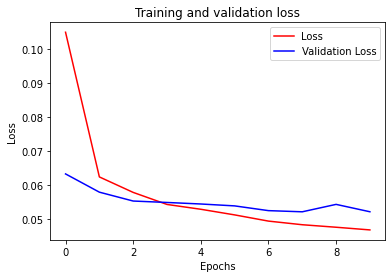

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(10)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

# LSTM

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM, GRU,Bidirectional, BatchNormalization, Dropout
from keras.initializers import Constant
embedding_dim = 300
def create_model(vocab_size, embedding_dim, maxlen, embedding):
    """
    Creates a binary sentiment classifier model

    Args:
        vocab_size (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
        embeddings_matrix (array): predefined weights of the embeddings

    Returns:
        model (tf.keras Model): the sentiment classifier model
    """

    model = tf.keras.Sequential([ 
        # This is how you need to set the Embedding layer when using pre-trained embeddings
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen,embeddings_initializer=Constant(embedding), trainable=False), 
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.4,recurrent_dropout=0.2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(6, activation = 'sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 


    return model

In [28]:
model_LSTM = create_model(VOCAB_SIZE, embed_size, maxlen, embedding)
# Train the model and save the training history
history = model_LSTM.fit(train_padding, train_labels, batch_size =64, epochs=10, validation_data=(val_padding, val_labels))

2023-01-25 05:03:14.201368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 05:03:14.202355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 05:03:14.358112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 05:03:14.359094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 05:03:14.360221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/10
704/704 [==============================] - 1197s 2s/step - loss: 0.1118 - accuracy: 0.7782 - val_loss: 0.0711 - val_accuracy: 0.9918
Epoch 2/10
704/704 [==============================] - 1177s 2s/step - loss: 0.0664 - accuracy: 0.9704 - val_loss: 0.0645 - val_accuracy: 0.9918
Epoch 3/10
704/704 [==============================] - 1172s 2s/step - loss: 0.0608 - accuracy: 0.9872 - val_loss: 0.0608 - val_accuracy: 0.9918
Epoch 4/10
704/704 [==============================] - 1176s 2s/step - loss: 0.0576 - accuracy: 0.9923 - val_loss: 0.0593 - val_accuracy: 0.9918
Epoch 5/10
704/704 [==============================] - 1155s 2s/step - loss: 0.0551 - accuracy: 0.9915 - val_loss: 0.0593 - val_accuracy: 0.9918
Epoch 6/10
704/704 [==============================] - 1153s 2s/step - loss: 0.0537 - accuracy: 0.9900 - val_loss: 0.0596 - val_accuracy: 0.9916
Epoch 7/10
704/704 [==============================] - 1152s 2s/step - loss: 0.0514 - accuracy: 0.9904 - val_loss: 0.0579 - val_accuracy:

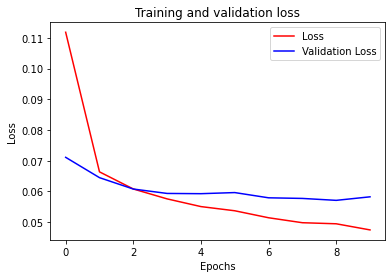

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(10)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

In [30]:
print("Loading model....")
#model = load_model('model_glovePP.hdf5')
y_pred = model_LSTM.predict(test_padding)

y_int = np.zeros_like(y_pred)
y_int[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test,y_int)

Loading model....


2023-01-25 08:26:58.666631: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 51182400 exceeds 10% of free system memory.


In [31]:
print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))

Classification report               precision    recall  f1-score   support

           0       0.62      0.72      0.67      6090
           1       0.49      0.13      0.21       367
           2       0.67      0.69      0.68      3691
           3       0.00      0.00      0.00       211
           4       0.60      0.55      0.58      3427
           5       0.62      0.03      0.05       712

   micro avg       0.63      0.62      0.62     14498
   macro avg       0.50      0.35      0.36     14498
weighted avg       0.62      0.62      0.60     14498
 samples avg       0.06      0.06      0.06     14498

Confusion matrix [[[55249  2639]
  [ 1694  4396]]

 [[63559    52]
  [  318    49]]

 [[59043  1244]
  [ 1131  2560]]

 [[63767     0]
  [  211     0]]

 [[59290  1261]
  [ 1532  1895]]

 [[63255    11]
  [  694    18]]]


# Kross validaton

In [69]:
# cross validation        
kfold = KFold(n_splits=10)
cvscores = []
accscores = []
rocscores = []

In [72]:
import tensorflow as tf
for train, test in kfold.split(train_padding, train_labels):

    model = tf.keras.Sequential([ 
          # This is how you need to set the Embedding layer when using pre-trained embeddings
          tf.keras.layers.Embedding(VOCAB_SIZE+1, embed_size, input_length=maxlen, weights=[embedding_matrix],trainable=False), 
          tf.keras.layers.Conv1D(32, kernel_size = 3, activation='relu'),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.GlobalAveragePooling1D(),
          tf.keras.layers.Dense(16, activation = 'relu'),
          tf.keras.layers.Dense(6, activation = 'sigmoid')
      ])


    model.compile(loss='binary_crossentropy',
                    optimizer='rmsprop',
                    metrics=['accuracy']) 
    saved_model = "model_glovePP.hdf5"
    checkpoint = ModelCheckpoint(saved_model, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

    history = model.fit(train_padding, y, epochs=10, validation_split=0.1)
    scores = model.evaluate(train_padding[test], y[test])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

    print("Loading model....")
    #model = load_model('model_glovePP.hdf5')
    y_pred = model.predict(test_padding)

    y_int = np.zeros_like(y_pred)
    y_int[y_pred > 0.5] = 1

    accuracy = accuracy_score(y_test,y_int)
    print('Accuracy is {}'.format(accuracy))
    accscores.append(accuracy)
    
    rocauc = roc_auc_score(y_test, y_pred)
    print('Roc-auc score is {}'.format(rocauc))
    rocscores.append(rocauc)
    
    print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))
        

Epoch 1/10
1266/1266 [==============================] - 9s 7ms/step - loss: 0.1507 - accuracy: 0.8058 - val_loss: 0.1022 - val_accuracy: 0.9920
Epoch 2/10
1266/1266 [==============================] - 9s 7ms/step - loss: 0.1003 - accuracy: 0.9939 - val_loss: 0.0884 - val_accuracy: 0.9927
Epoch 3/10
1266/1266 [==============================] - 8s 7ms/step - loss: 0.0909 - accuracy: 0.9939 - val_loss: 0.0816 - val_accuracy: 0.9927
Epoch 4/10
1266/1266 [==============================] - 9s 7ms/step - loss: 0.0858 - accuracy: 0.9940 - val_loss: 0.0777 - val_accuracy: 0.9927
Epoch 5/10
1266/1266 [==============================] - 8s 7ms/step - loss: 0.0819 - accuracy: 0.9940 - val_loss: 0.0751 - val_accuracy: 0.9927
Epoch 6/10
1266/1266 [==============================] - 9s 7ms/step - loss: 0.0793 - accuracy: 0.9940 - val_loss: 0.0733 - val_accuracy: 0.9927
Epoch 7/10
1266/1266 [==============================] - 9s 7ms/step - loss: 0.0769 - accuracy: 0.9940 - val_loss: 0.0725 - val_accuracy:

In [75]:
accscores


[0.891337647316265,
 0.8973553408984338,
 0.9000593954171746,
 0.8975116446278408,
 0.8968551689643315,
 0.8938541373597174,
 0.8987933352089781,
 0.8973553408984338,
 0.8958391947231861,
 0.8993872893807247]

In [77]:
rocscores

[0.9193628331567466,
 0.9154715384734319,
 0.9132520408065788,
 0.9115063411225554,
 0.9274767742430557,
 0.93035158414735,
 0.9258382961712733,
 0.9285513766370873,
 0.9162749900365196,
 0.9186170327176452]